Easy
Нужно посмотреть, по каким переменным имеет смысл объединять пользователей в группы (например, используя sns.pairplot). Можно взять все признаки. Провести кластеризацию, подобрав количество кластеров "на глаз".

In [2]:
import numpy as np 
from numpy import mean,std
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import seaborn as sns

In [17]:
data=pd.read_csv("CC GENERAL.csv")
data=data.dropna()
data.head()
#data=data.drop('CUST_ID', 1)
#data=data[["BALANCE","BALANCE_FREQUENCY","PURCHASES","ONEOFF_PURCHASES","CASH_ADVANCE","PURCHASES_FREQUENCY","CREDIT_LIMIT","PURCHASES_INSTALLMENTS_FREQUENCY"]]

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
4  C10005   817.714335           1.000000      16.00             16.00   
5  C10006  1809.828751           1.000000    1333.28              0.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   95.40      0.000000             0.166667   
1                    0.00   6442.945483             0.000000   
2                    0.00      0.000000             1.000000   
4                    0.00      0.000000             0.083333   
5                 1333.28      0.000000             0.666667   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
4                    0.083333                          0.000000   
5                    0.000000                          0.583333   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                    0.00                 0              2        1000.0   
1                    0.25                 4              0        7000.0   
2                    0.00                 0             12        7500.0   
4                    0.00                 0              1        1200.0   
5                    0.00                 0              8        1800.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
4   678.334763        244.791237          0.000000      12  
5  1400.057770       2407.246035          0.000000      12

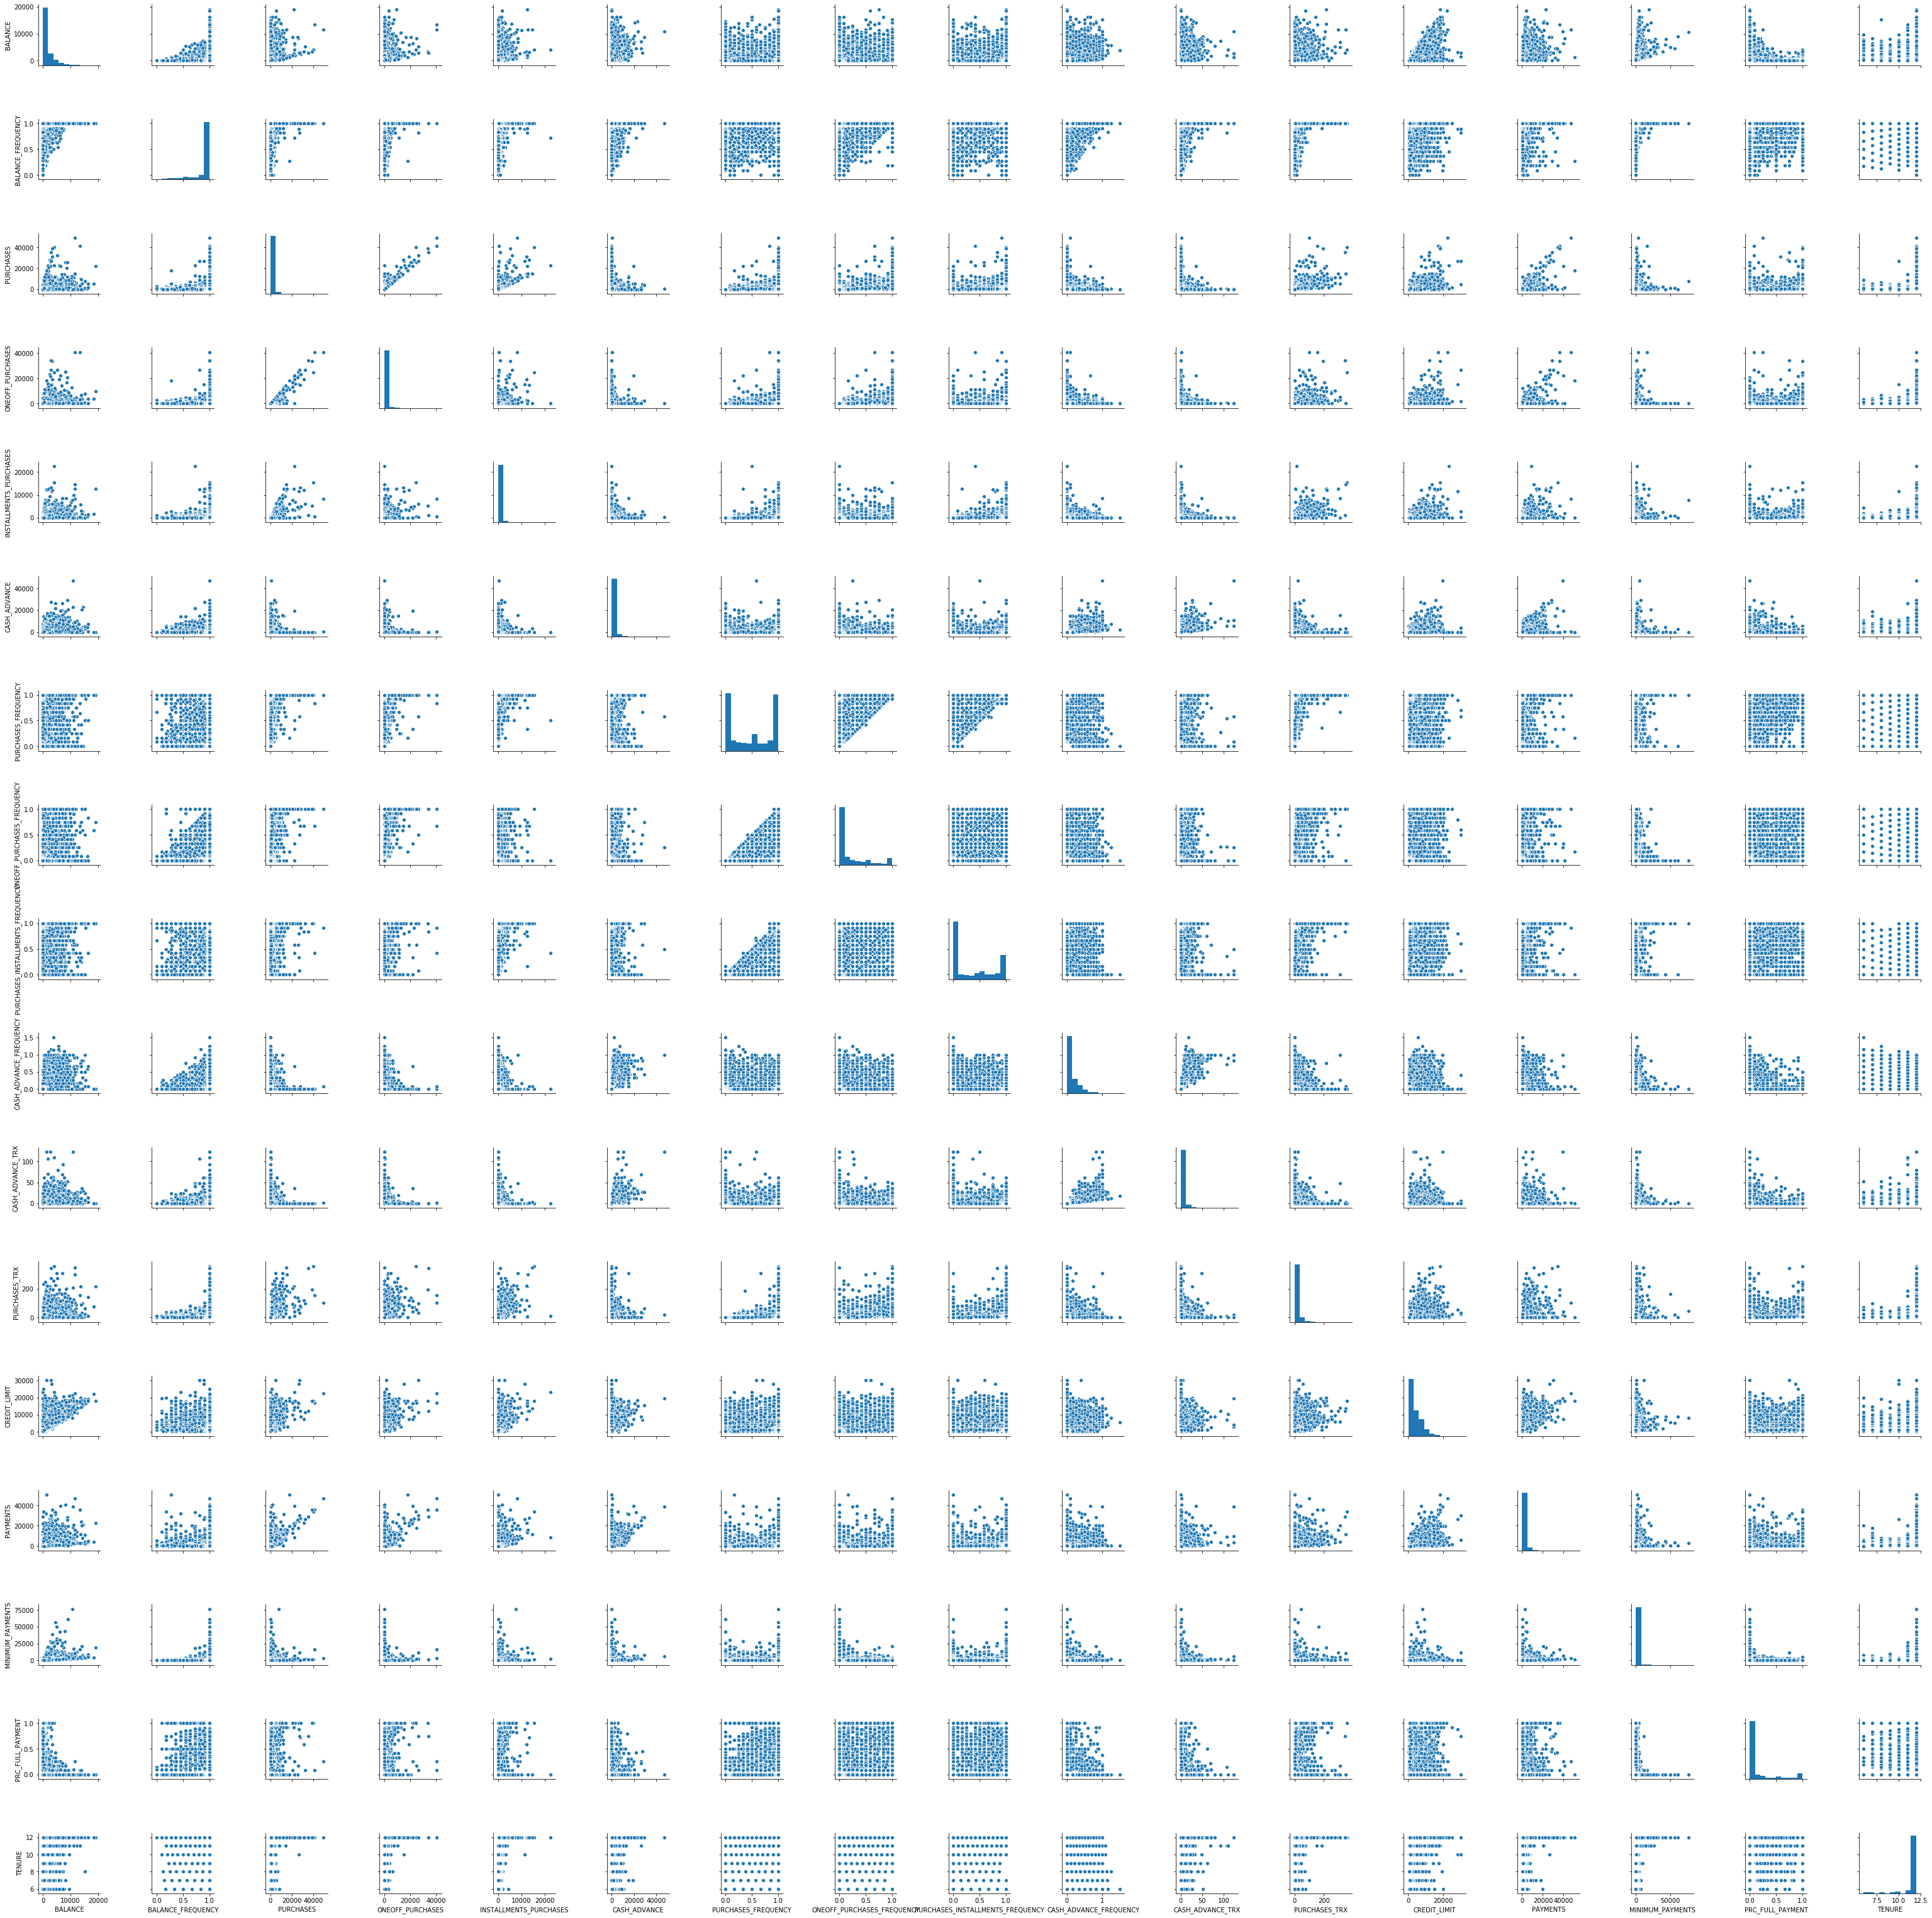

In [4]:
sns.pairplot(data)

Попробуем разделить на 3 кластера

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


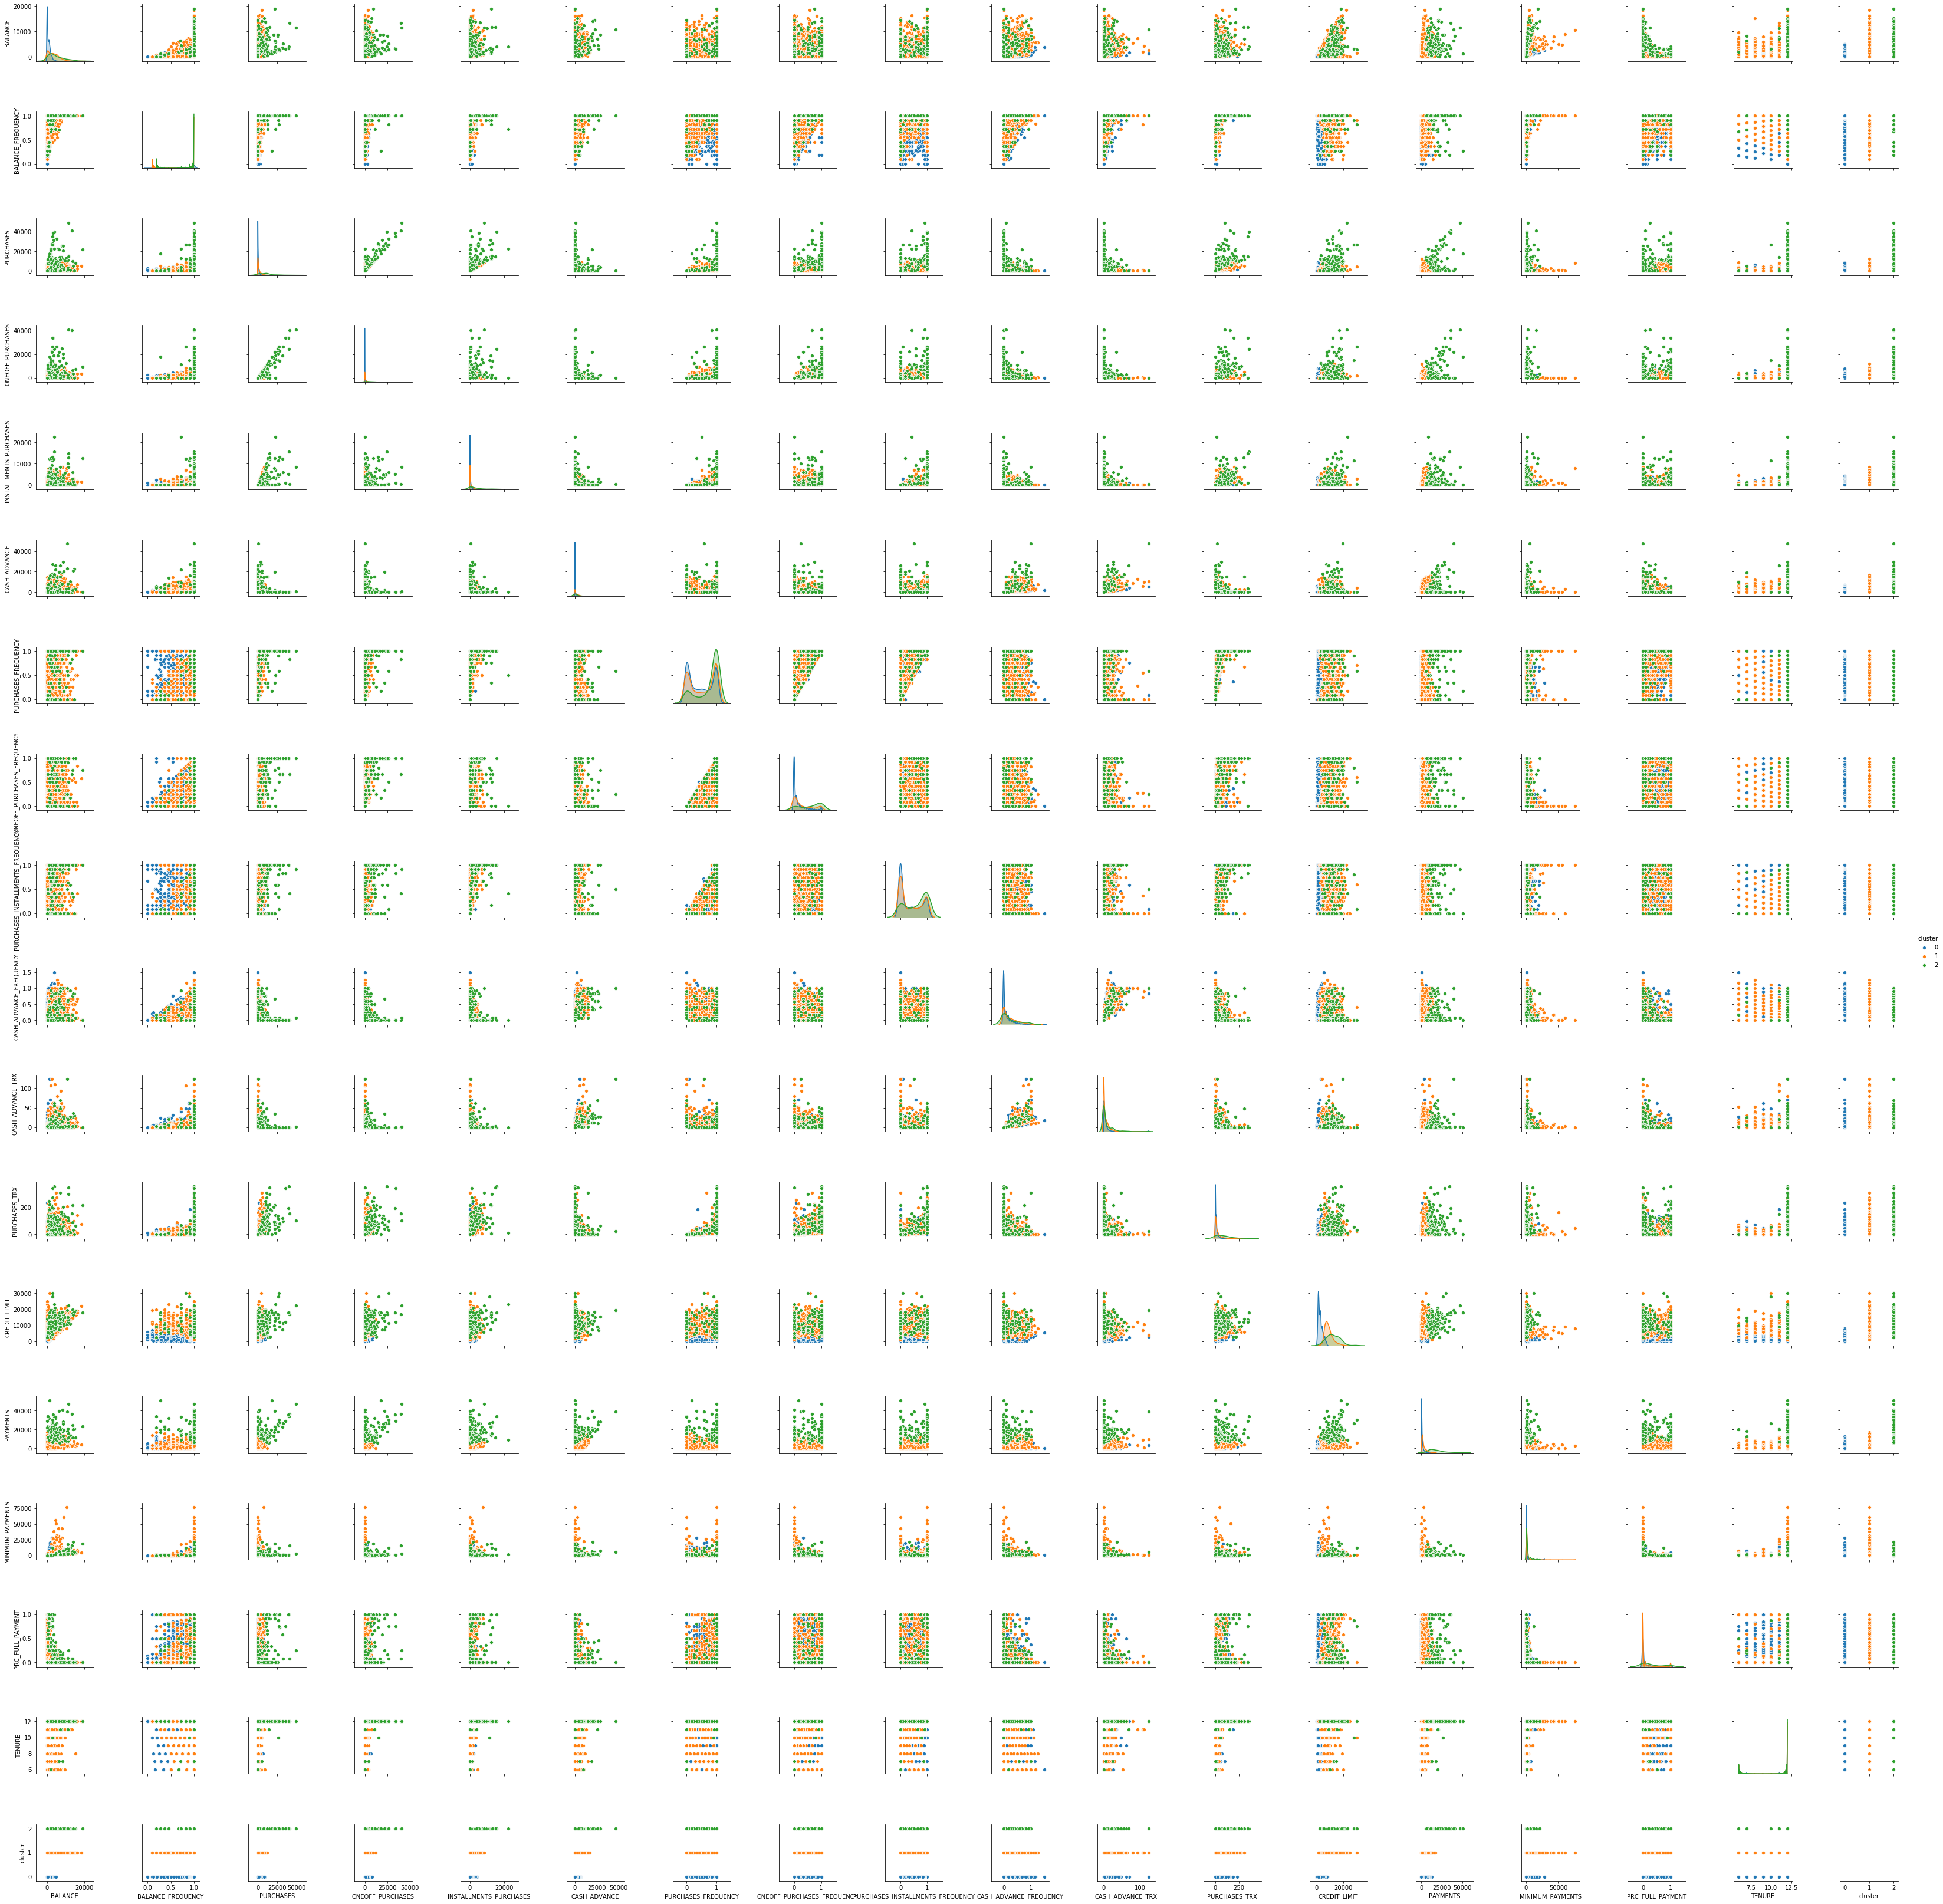

In [7]:
model=KMeans(3)
labels=model.fit_predict(data.values)
data["cluster"]=labels
sns.pairplot(data,hue="cluster")

Normal
Определить количество кластеров при помощи метода Elbow.

Вывести график с разделением на группы в координатах BALANCE-PURCHASES и BALANCE-PURCHASER_INSTALLMENTS_FREQUENCY. Видны ли какие-то закономерности?

In [8]:
def distance_by_n(x, n):
    model = KMeans(n_clusters=n)
    model.fit(x)
    return model.inertia_

Text(0.5, 1.0, 'Elbow method')

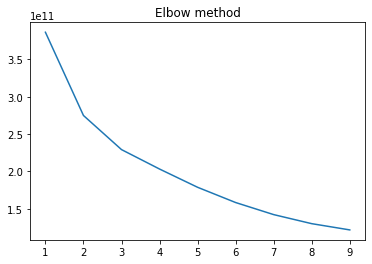

In [9]:
distances = [distance_by_n(data.values, n) for n in range(1, 10)]
plt.plot(range(1, 10), distances)
plt.title('Elbow method')

Оставим 4 кластера:

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


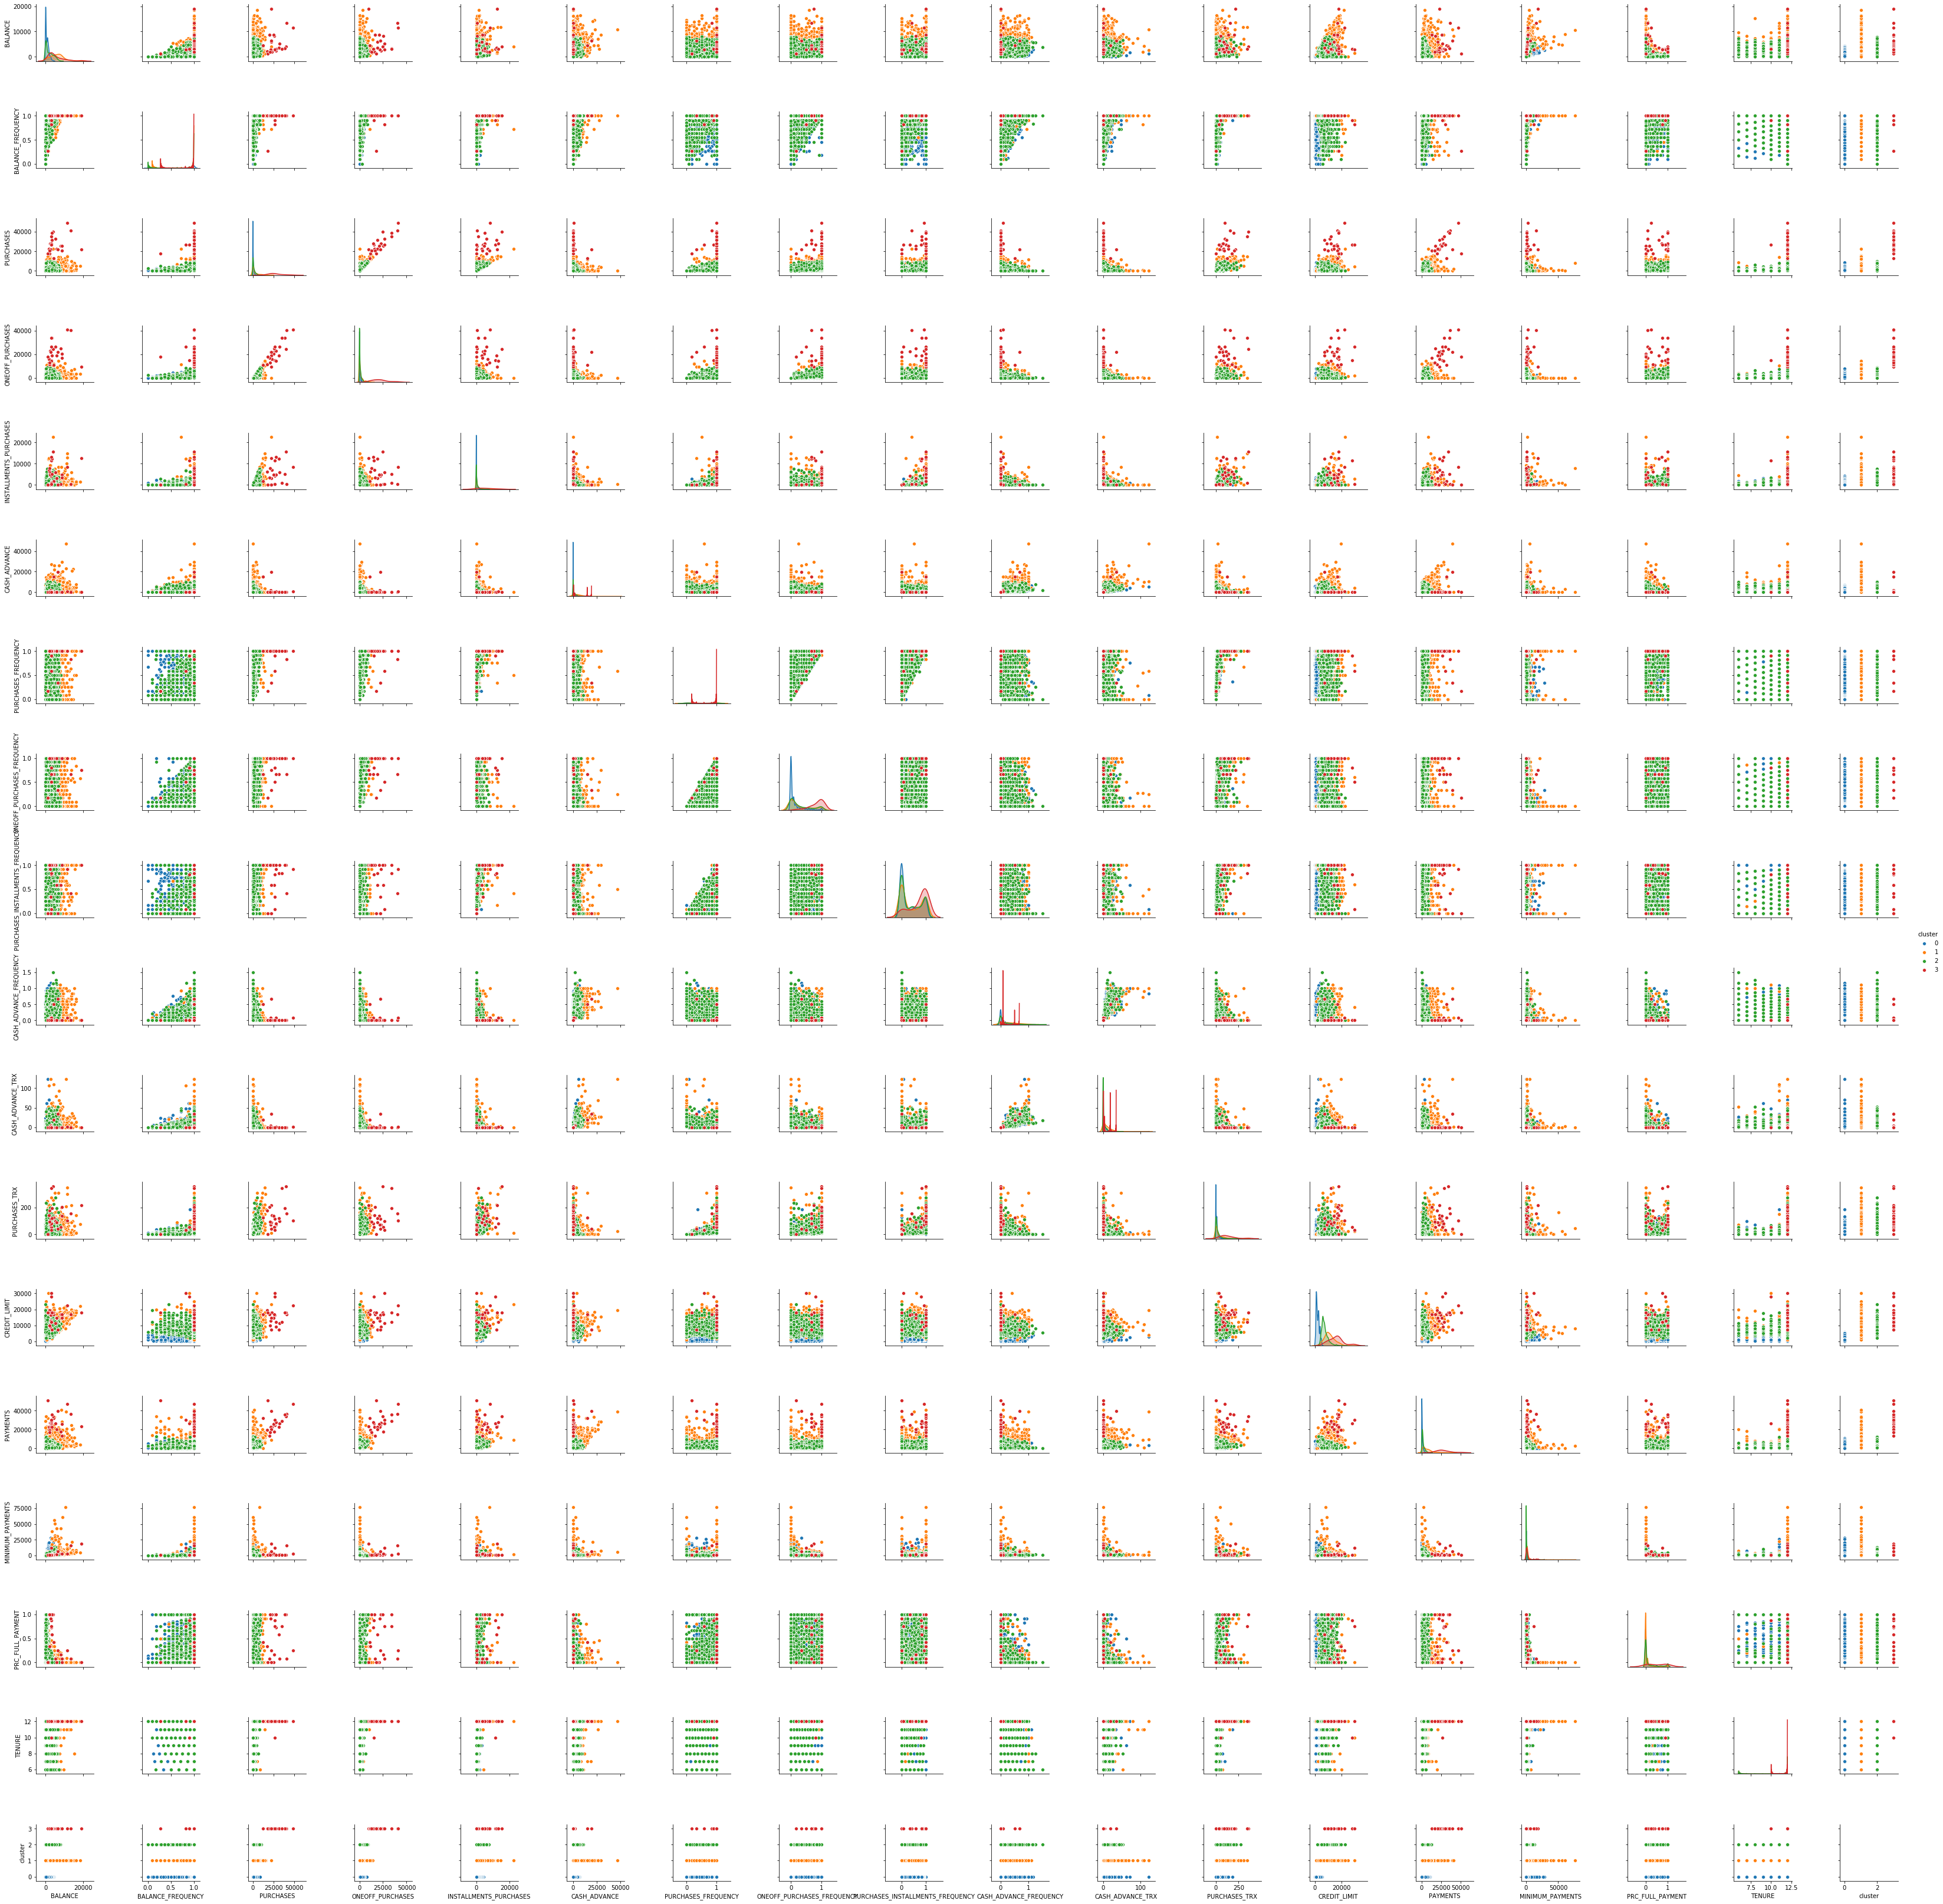

In [10]:
model=KMeans(4)
labels=model.fit_predict(data.values)
data["cluster"]=labels
sns.pairplot(data,hue="cluster")

При исследовании зависимости между балансом карты и покупкам с помощью DBSCAN - мы получили 4 кластера (люди с высоким балансом, которые тратят много- зеленый кластер, люди со средним балансом, которые в свою очередь делятся на тех, кто покупает мнного и оотносительно мало (желтый и фиолетовый) и люди с низкими доходами, которые тратят мало ).

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


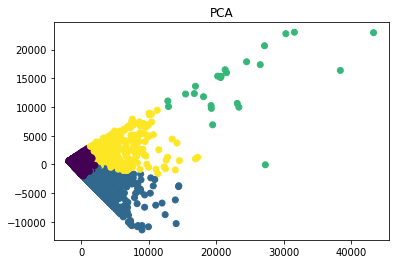

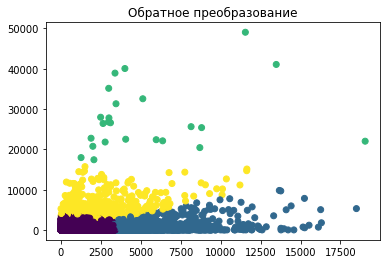

In [15]:
from sklearn.cluster import DBSCAN
data1=data[["BALANCE","PURCHASES"]]
labels=model.fit_predict(data1.values)
data1["cluster"]=labels
pca = PCA(2)
pca_result = pca.fit_transform(data1.values)
plt.scatter(pca_result[:, 0], pca_result[:, 1],c=labels)
plt.title('PCA')
inverse = pca.inverse_transform(pca_result)

plt.figure()
plt.title('Обратное преобразование')
plt.scatter(inverse[:, 0], inverse[:, 1],c=labels)

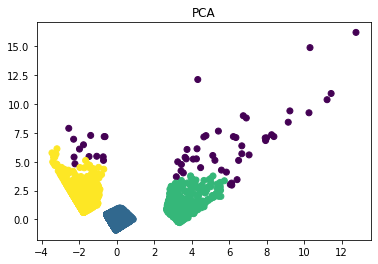

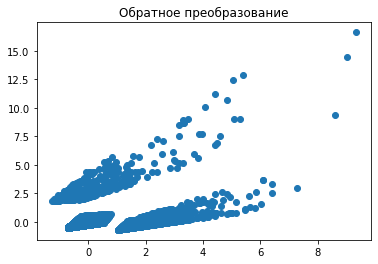

In [13]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
pca = PCA(2)
df1_std=(data1-np.mean(data1))/data1.std()
pca_result =pca.fit_transform(df1_std.values)
dbscan=DBSCAN()
labels=dbscan.fit_predict(df1_std.values)
plt.scatter(pca_result[:, 0], pca_result[:, 1],c=labels)
plt.title('PCA')
inverse = pca.inverse_transform(pca_result)

plt.figure()
plt.title('Обратное преобразование')
plt.scatter(inverse[:, 0], inverse[:, 1])

При исследовании баланса и частоты покупок, мы видим, что большинство выборки лежит в диапазоне от 0 до 10000, выбросы есть, но вряд ли они могут составить отдельную группу.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


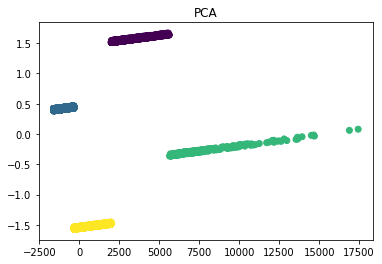

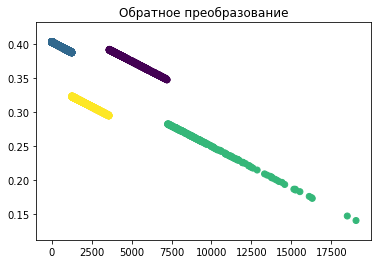

In [20]:
data2=data[["BALANCE","PURCHASES_INSTALLMENTS_FREQUENCY"]]
labels=model.fit_predict(data2.values)
data2["cluster"]=labels
pca = PCA(2)
pca_result = pca.fit_transform(data1.values)
plt.scatter(pca_result[:, 0], pca_result[:, 1],c=labels)
plt.title('PCA')
inverse = pca.inverse_transform(pca_result)

plt.figure()
plt.title('Обратное преобразование')
plt.scatter(inverse[:, 0], inverse[:, 1],c=labels)

Hard
Посмотреть зависимости между другими признаками и попробовать проинтерпретировать какие-то кластеры.

Попробуем найти зависимость между частотой совершаемых покупок и их денежным эквивалентом:ONEOFFPURCHASES +PURCHASES_INSTALLMENTS_FREQUENCY
Скорее всего, дорогие покупки совершаются реже, чем частые.В следующем исследовании предскажем зависимость максимальной стоимости покупки от баланса карты.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


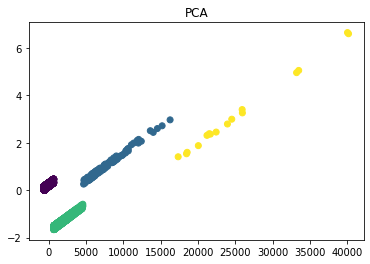

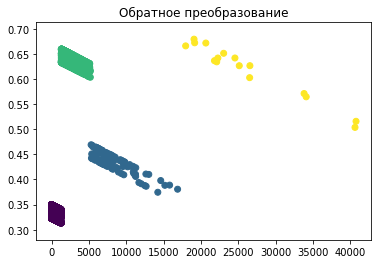

In [22]:
data3=data[["ONEOFF_PURCHASES","PURCHASES_INSTALLMENTS_FREQUENCY"]]
labels=model.fit_predict(data3.values)
data3["cluster"]=labels
pca = PCA(2)
pca_result = pca.fit_transform(data3.values)
plt.scatter(pca_result[:, 0], pca_result[:, 1],c=labels)
plt.title('PCA')
inverse = pca.inverse_transform(pca_result)

plt.figure()
plt.title('Обратное преобразование')
plt.scatter(inverse[:, 0], inverse[:, 1],c=labels)

Как мы видим, большинство максимальных по сумме покупок делается с частотой от 0 до 2 раз.Посмотрим на взаимосвязь с балансом карты.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


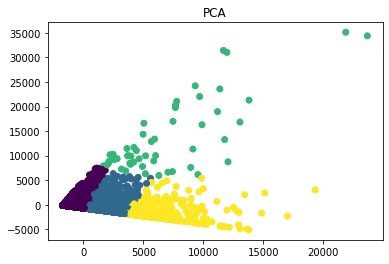

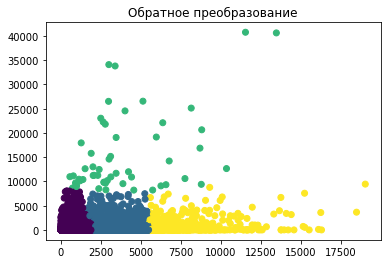

In [23]:
data4=data[["BALANCE","ONEOFF_PURCHASES"]]
labels=model.fit_predict(data4.values)
data4["cluster"]=labels
pca = PCA(2)
pca_result = pca.fit_transform(data4.values)
plt.scatter(pca_result[:, 0], pca_result[:, 1],c=labels)
plt.title('PCA')
inverse = pca.inverse_transform(pca_result)

plt.figure()
plt.title('Обратное преобразование')
plt.scatter(inverse[:, 0], inverse[:, 1],c=labels)

С ростом баланса,сумма покупки не особо растет,а даже падает по мере увеличения счета, однако есть люди, котрые не имея большого баланса совершают догрогостоящие покупки (зеленая группа).